In [1]:
from src.crawler.base_crawler import BaseCrawler
from bs4 import BeautifulSoup
import pandas as pd
from pprint import pprint
import re
import json
import os
import numpy as np

tsv_dataにtsvをpdで取り出します. 

In [2]:
import re
import requests
import gzip
import pandas as pd

class Tsv_Crawler(BaseCrawler):
    def __init__(self,last=0,di="data/Tsv_data"):
        super().__init__()
        self.di=di
        self.file_name=["name.basics.tsv.gz","title.akas.tsv.gz","title.basics.tsv.gz","title.crew.tsv.gz","title.episode.tsv.gz","title.principals.tsv.gz","title.ratings.tsv.gz"]
        self.full_load(last)
        self.title_connect()
    
    def download_Tsv(self,url):      
        filename = url.split("/")[-1]
        with open(self.di+"/"+filename, "wb") as f:
            r = requests.get(url)
            f.write(r.content)
        print("success download from "+url)
        
    def full_download_Tsv(self):
        try:
            os.makedirs(self.di)
        except FileExistsError:
            pass
        
        test_url = 'https://datasets.imdbws.com'
        res = self.get_response(test_url)
        soup = BeautifulSoup(markup=res.content, features='html.parser')
        for tr in soup.find_all("a"):
            Tsv_url=tr.get('href')
            if re.search(".tsv.gz",Tsv_url):
                self.download_Tsv(Tsv_url)
    
                  
    def load_Tsv_as_pd(self,file):
        df=pd.read_table(self.di+"/"+file,index_col=0)
        #実行速度上げる用nrows=60000
        return df
    
    def elminate_double(self):
        self.full_pd[1]=self.full_pd[1][self.full_pd[1]["ordering"]==1]
        self.full_pd[5]=self.full_pd[5][self.full_pd[5]["ordering"]==1]
        self.full_pd[1]=self.full_pd[1].drop(columns='ordering')
        self.full_pd[5]=self.full_pd[5].drop(columns='ordering')
        
    
    def split_pd(self,last):
        for i in range(len(self.full_pd)):
            if i>=1:
                self.full_pd[i]=self.full_pd[i][self.full_pd[i].index.str[2:].astype(int)<=last]
            
    
    def full_load(self,last):
        self.full_pd=[]
        if not os.path.exists(self.di):
            self.full_download_Tsv()
        for name in self.file_name:
            self.full_pd.append(self.load_Tsv_as_pd(name))
        
        self.elminate_double()
        #最後のid指定
        #self.split_pd(last)

                
    def load_title(self):
        self.title=pd.read_table(self.di+"/title.csv",index_col=0)

    
    def title_connect(self):
        c=0
        for pa in self.full_pd:
            c+=1
            if c==2:
                df=pa
            elif c>=3:
                df=df.join(pa ,how='outer')
        self.title=df
        self.title.to_csv(self.di+"/title.csv")
    
        
Tsv = Tsv_Crawler()



/home/u00445/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  # This is added back by InteractiveShellApp.init_path()
/home/u00445/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  # This is added back by InteractiveShellApp.init_path()


In [3]:
Tsv.title

,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,...,writers,parentTconst,seasonNumber,episodeNumber,nconst,category,job,characters,averageRating,numVotes
tt0000001,Карменсіта,UA,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0.0,...,\N,NaN,NaN,NaN,nm1588970,self,\N,"[""Self""]",5.6,1656.0
tt0000002,Le clown et ses chiens,\N,\N,original,\N,1,short,Le clown et ses chiens,Le clown et ses chiens,0.0,...,\N,NaN,NaN,NaN,nm0721526,director,\N,\N,6.1,201.0
tt0000003,Sarmanul Pierrot,RO,\N,imdbDisplay,\N,0,short,Pauvre Pierrot,Pauvre Pierrot,0.0,...,\N,NaN,NaN,NaN,nm0721526,director,\N,\N,6.5,1369.0
tt0000004,Un bon bock,\N,\N,original,\N,1,short,Un bon bock,Un bon bock,0.0,...,\N,NaN,NaN,NaN,nm0721526,director,\N,\N,6.2,122.0
tt0000005,Blacksmithing Scene,US,\N,alternative,\N,0,short,Blacksmith Scene,Blacksmith Scene,0.0,...,\N,NaN,NaN,NaN,nm0443482,actor,\N,"[""Blacksmith""]",6.2,2156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9916848,Épisode #3.17,FR,fr,\N,\N,0,tvEpisode,Episode #3.17,Episode #3.17,0.0,...,"nm6182221,nm1628284,nm2921377",tt1289683,3,17,nm5519557,actor,\N,"[""Cetin Ertas""]",NaN,NaN
tt9916850,Episódio #3.19,PT,pt,\N,\N,0,tvEpisode,Episode #3.19,Episode #3.19,0.0,...,"nm6182221,nm1628284,nm2921377",tt1289683,3,19,nm5519557,actor,\N,"[""Cetin Ertas""]",NaN,NaN
tt9916852,Episodio #3.20,ES,es,\N,\N,0,tvEpisode,Episode #3.20,Episode #3.20,0.0,...,"nm6182221,nm1628284,nm2921377",tt1289683,3,20,nm5519557,actor,\N,"[""Cetin Ertas""]",NaN,NaN
tt9916856,The Wind,DE,\N,\N,\N,0,short,The Wind,The Wind,0.0,...,nm6951431,NaN,NaN,NaN,nm3394271,actress,\N,"[""Maria""]",NaN,NaN


In [4]:
print(Tsv.title.columns)

Index(['title', 'region', 'language', 'types', 'attributes', 'isOriginalTitle',
       'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear',
       'endYear', 'runtimeMinutes', 'genres', 'directors', 'writers',
       'parentTconst', 'seasonNumber', 'episodeNumber', 'nconst', 'category',
       'job', 'characters', 'averageRating', 'numVotes'],
      dtype='object')


region
language
types
titleType
isAdult
startYear
genres
category
averageRating


/home/u00445/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/u00445/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0, flags=flags)


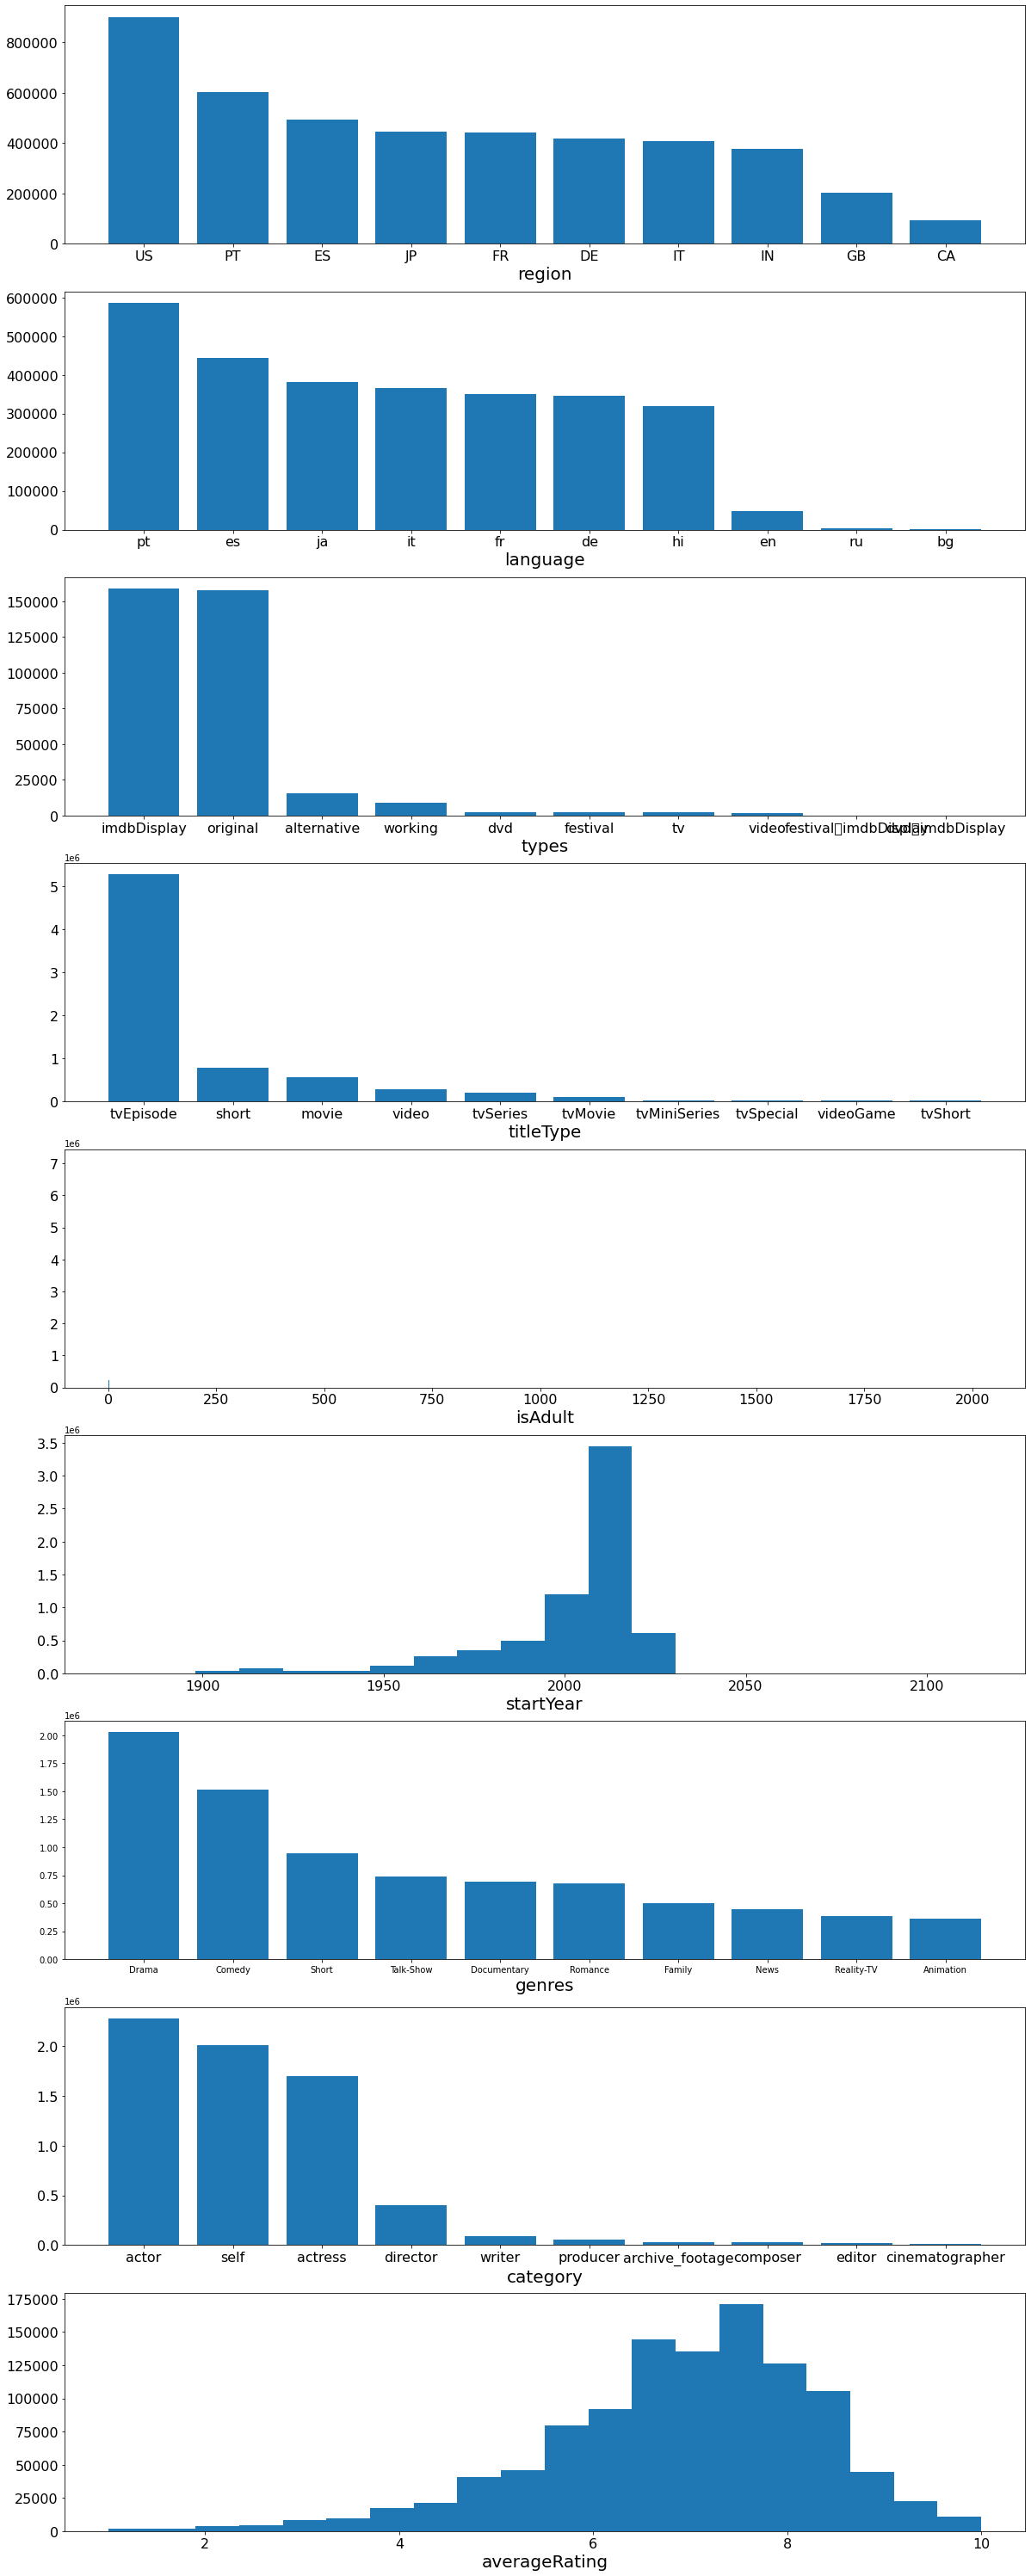

In [5]:
import math
import matplotlib.pyplot as plt
#target_histogram

def split_count(pand):
    count={}
    for i in range(len(pand)):
        if not pd.isna(pand[i]):
            genre=pand[i].split(",")
            for g in genre:
                if g in count:
                    count[g]+=1
                else:
                    count[g]=1
    return pd.Series(count).sort_values(ascending=False)
        

columns_labels=['region', 'language' ,'types' , 'titleType','isAdult',
 'startYear','genres',
 'category', 
 'averageRating' ]


hist=['startYear' ,'averageRating' ]
split=['genres']
choose_top=['category', 'genres','region', 'language','types'  ]
mem=['startYear']



N=len(columns_labels)
ncols=1
nrows=math.ceil(N/1)
fig, axes = plt.subplots(nrows,ncols,figsize=(20,6*nrows))
for ax,la in zip(axes.flat, columns_labels):
    print(la)
    ax.tick_params(labelsize = 16)
    if la in hist:
        ax.hist(Tsv.title[la].replace('\\N', np.nan).astype('float'),bins=20)
    
    else:
        if la in split:
            c=split_count(Tsv.title[la])
            ax.tick_params(labelsize = 10)
        else:
            c=Tsv.title[la].value_counts()
        try:
            c=c.drop('\\N', axis=0)
        except:
            c=c
        if la in choose_top:
            c=c.iloc[0:10]
        ax.bar(c.index,c.values)
    ax.set_xlabel(la,fontsize = 20)
    
    